In [14]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as snsa

In [15]:
red = pd.read_csv('C:\\Users\\shubh\\Downloads\\winequality-red.csv', sep=';')
print(red.shape)


(1599, 12)


In [16]:
red['class']=0
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [17]:
white = pd.read_csv('C:\\Users\\shubh\\Downloads\\winequality-white.csv', sep=';')
print(white.shape)

(4898, 12)


In [18]:
white['class']=1
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [19]:
bigdata = red.append(white, ignore_index=True)

In [20]:
bigdata.shape

(6497, 13)

In [21]:
bigdata.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.0

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [23]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [24]:
bigdata = bigdata.dropna(subset=['fixed acidity'])
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


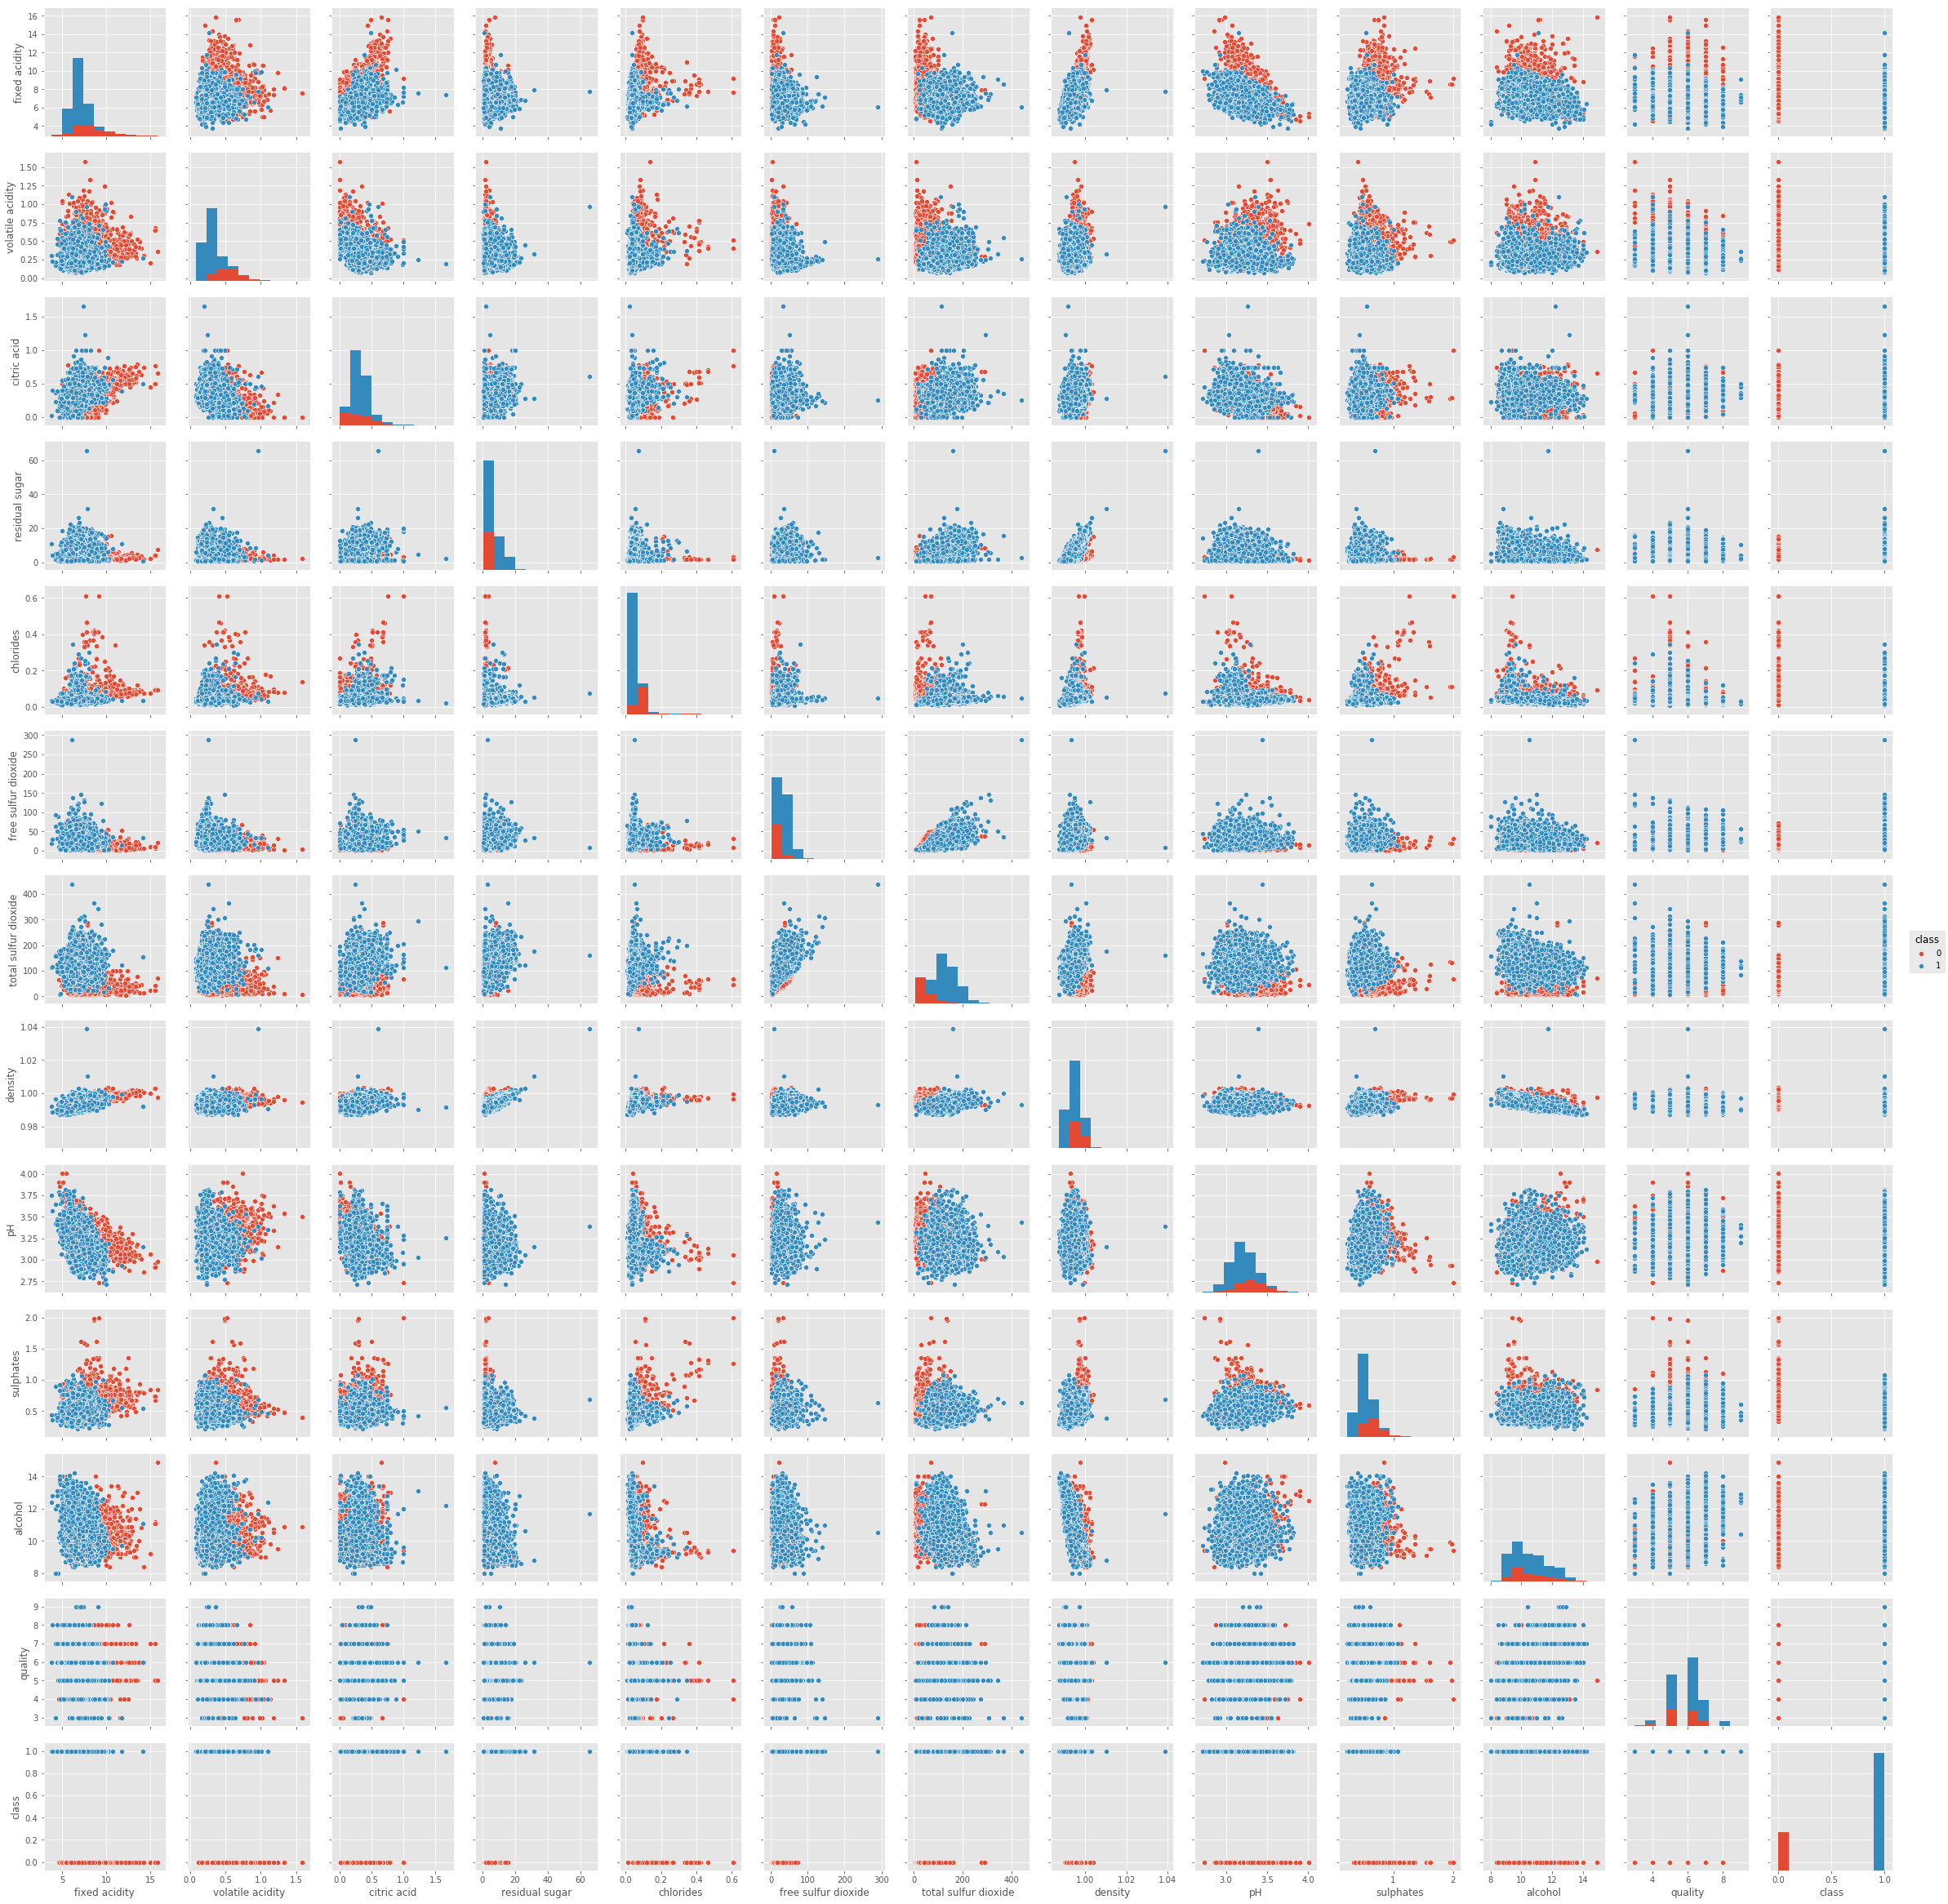

In [25]:
sns.pairplot(bigdata, hue='class', size=2.5)

In [26]:
bigdata['class'].value_counts()

1    4898
0    1599
Name: class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022550EE4DA0>]],
      dtype=object)

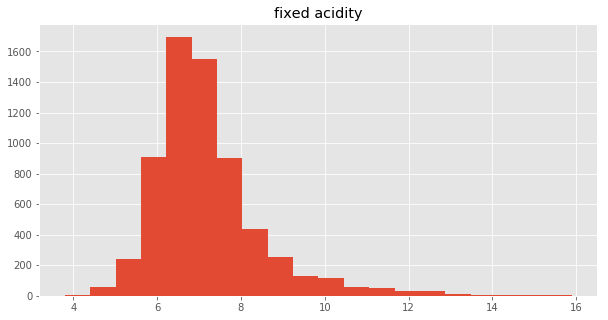

In [27]:
bigdata.hist(column = 'fixed acidity',bins=20, figsize=(10,5))

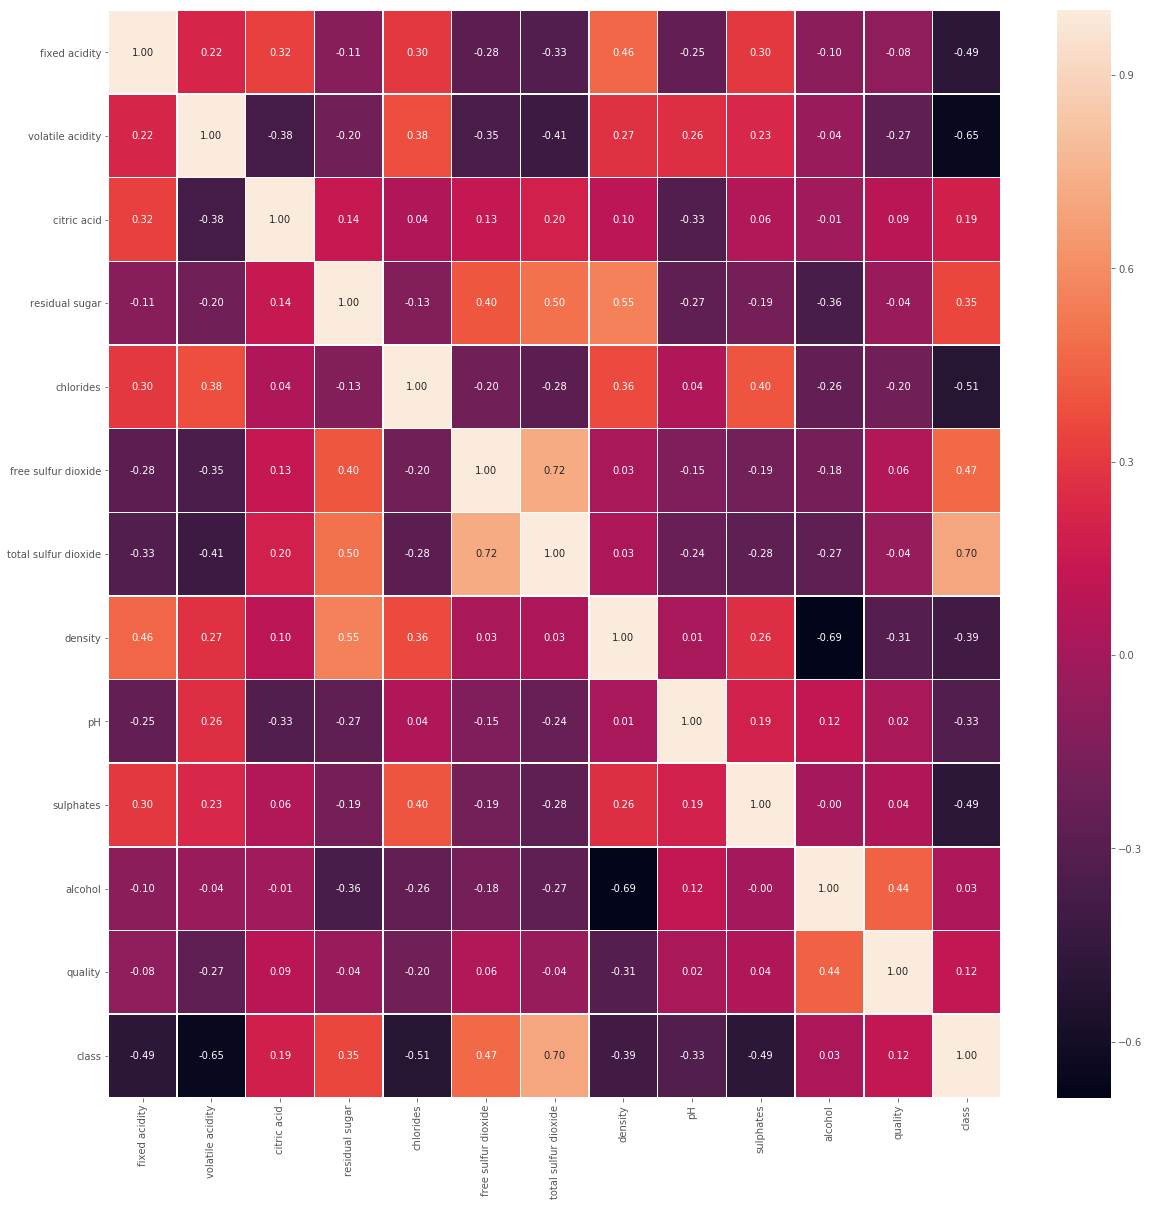

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(bigdata.corr(), annot=True, linewidth=0.5, fmt='.2f');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022550F55940>]],
      dtype=object)

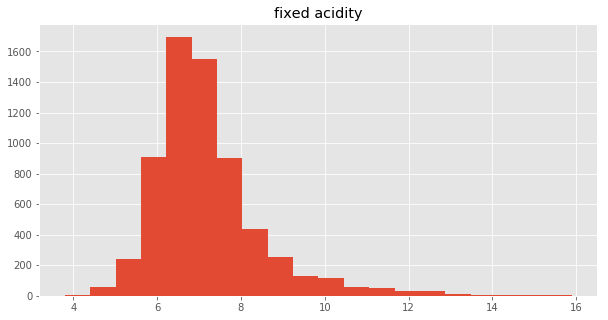

In [29]:
bigdata.loc[bigdata.alcohol< 1, ['fixed acidity']]*100
bigdata.hist(column = 'fixed acidity',bins=20, figsize=(10,5))

In [30]:
X=bigdata.iloc[:, 0:-1]
y=bigdata.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [33]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6467    1
6468    1
6469    1
6470    1
6471    1
6472    1
6473    1
6474    1
6475    1
6476    1
6477    1
6478    1
6479    1
6480    1
6481    1
6482    1
6483    1
6484    1
6485    1
6486    1
6487    1
6488    1
6489    1
6490    1
6491    1
6492    1
6493    1
6494    1
6495    1
6496    1
Name: class, Length: 6497, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression


In [35]:
clf = LogisticRegression()

In [36]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
print (clf.intercept_, clf.coef_)

[2.66862591] [[-0.70173379 -8.0777188   0.88176643  0.15541468 -2.00804648 -0.0469244
   0.06428792  2.45570065 -2.05070301 -6.77020913  0.81667157  0.11229504]]


In [39]:
pred = clf.predict(X_train)

In [40]:
print ('Accuracy from logistic regression: {0}'.format(clf.score(X_train, y_train)))

Accuracy from sk-learn: 0.9835056080932483


In [41]:
y_pred=clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, y_pred.reshape(-1, 1))

0.9774358974358974

In [55]:
from sklearn.svm import SVC

In [98]:
support=SVC(random_state=42, kernel='linear', C=2)

In [99]:
support.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
y_pred=support.predict(X_test)

In [63]:
from mlxtend.plotting import plot_decision_regions

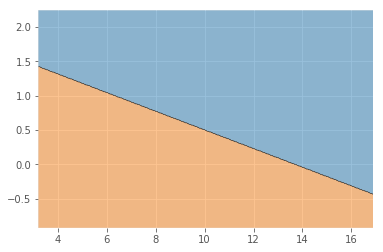

In [101]:
# Plot Decision Region using mlxtend's awesome plotting function
a={2: 0.3, 3: 0.4, 4: 0.5, 5: 0.6, 6: 0.7, 7: 0.8, 8: 0.9, 9: 0.94, 10: 0.95, 11: 0.98}
plot_decision_regions(X=X_test.values, y=y_pred, clf= support, filler_feature_values=a, legend=2);
plt.show()